In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# Creating Product Segments using Clustering

In [2]:
players_df = pd.read_excel( 'ultimate_df.xlsx' )
players_df

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,2000,Tariq Abdul-Wahad,SG,25,1.981103,101.133787,2,1997,11,...,0.756477,101,190,291,98,59,28,106,147,697
1,1,2000,Shareef Abdur-Rahim,SF,23,2.057300,102.040816,3,1996,3,...,0.809437,218,607,825,271,89,87,249,244,1663
2,2,2000,Cory Alexander,PG,26,1.854110,83.900227,4,1995,29,...,0.772727,8,34,42,58,24,2,28,39,82
3,3,2000,Ray Allen,SG,24,1.955705,92.970522,3,1996,5,...,0.886935,83,276,359,308,110,19,183,187,1809
4,4,2000,Rafer Alston,PG,23,1.879508,79.365079,0,1998,39,...,0.750000,5,18,23,70,12,0,29,29,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,10982,2022,Thaddeus Young,PF,33,2.031901,106.575964,14,2007,12,...,0.469388,80,128,208,104,54,18,52,81,322
10983,10983,2022,Trae Young,PG,23,1.854110,81.632653,3,2018,5,...,0.904159,50,234,284,737,72,7,303,128,2155
10984,10984,2022,Omer Yurtseven,C,23,2.108097,115.646259,1,2020,80,...,0.622951,85,209,294,49,17,20,41,84,299
10985,10985,2022,Cody Zeller,C,29,2.108097,108.843537,8,2013,4,...,0.775510,50,75,125,22,8,6,19,56,140


In [3]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          10987 non-null  int64  
 1   year        10987 non-null  int64  
 2   Player      10987 non-null  object 
 3   Pos         10987 non-null  object 
 4   Age         10987 non-null  int64  
 5   HT          10987 non-null  float64
 6   WT          10987 non-null  float64
 7   YOS         10987 non-null  int64  
 8   Draft Year  10987 non-null  int64  
 9   Final Pick  10987 non-null  int64  
 10  Tm          10987 non-null  object 
 11  G           10987 non-null  int64  
 12  GS          10987 non-null  int64  
 13  MP          10987 non-null  int64  
 14  FG          10987 non-null  int64  
 15  FGA         10987 non-null  int64  
 16  FG%         10987 non-null  float64
 17  3P          10987 non-null  int64  
 18  3PA         10987 non-null  int64  
 19  3P%         10987 non-nul

In [4]:
players_df.columns

Index(['Rk', 'year', 'Player', 'Pos', 'Age', 'HT', 'WT', 'YOS', 'Draft Year',
       'Final Pick', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_players_df = scaler.fit_transform( players_df[['HT','WT' ,'Final Pick', '2P','3P','AST','BLK']] )

In [6]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

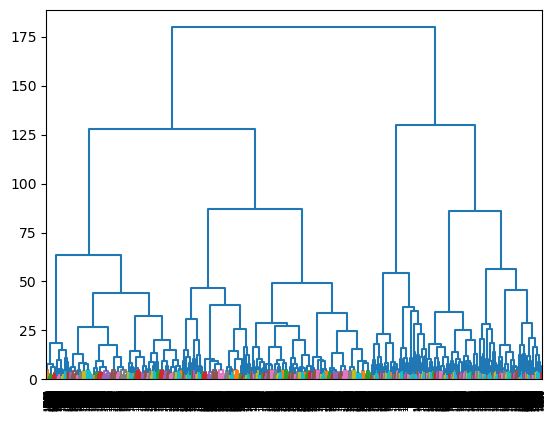

In [8]:
Z = linkage(scaled_players_df, method='ward', metric='euclidean')
dendrogram(Z, color_threshold=5, no_labels=False)
plt.show()

In [9]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_players_df )
players_df["h_clusterid"] = h_clusters.labels_

In [10]:
players_df[players_df.h_clusterid == 0]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid
0,0,2000,Tariq Abdul-Wahad,SG,25,1.981103,101.133787,2,1997,11,...,101,190,291,98,59,28,106,147,697,0
2,2,2000,Cory Alexander,PG,26,1.854110,83.900227,4,1995,29,...,8,34,42,58,24,2,28,39,82,0
4,4,2000,Rafer Alston,PG,23,1.879508,79.365079,0,1998,39,...,5,18,23,70,12,0,29,29,60,0
5,5,2000,John Amaechi,C,29,2.082698,122.448980,1,1995,78,...,62,204,266,95,35,37,139,161,836,0
10,10,2000,Chris Anstey,C,25,2.133496,114.739229,2,1997,18,...,90,190,280,65,29,25,80,180,439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980,10980,2022,Moses Wright,PF,23,2.031901,102.494331,0,2021,80,...,1,2,3,2,0,1,0,0,5,0
10981,10981,2022,Gabe York,SG,28,1.904907,83.900227,0,2016,80,...,0,2,2,4,2,1,1,4,8,0
10982,10982,2022,Thaddeus Young,PF,33,2.031901,106.575964,14,2007,12,...,80,128,208,104,54,18,52,81,322,0
10984,10984,2022,Omer Yurtseven,C,23,2.108097,115.646259,1,2020,80,...,85,209,294,49,17,20,41,84,299,0


In [11]:
players_df[players_df.h_clusterid == 1]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid
3,3,2000,Ray Allen,SG,24,1.955705,92.970522,3,1996,5,...,83,276,359,308,110,19,183,187,1809,1
6,6,2000,Derek Anderson,SG,25,1.955705,87.981859,2,1997,13,...,80,178,258,220,90,11,167,149,1080,1
7,7,2000,Kenny Anderson,PG,29,1.828711,76.190476,8,1991,2,...,55,170,225,420,139,8,130,230,1149,1
8,8,2000,Nick Anderson,SG,32,1.981103,103.401360,10,1989,11,...,83,256,339,123,94,16,95,118,781,1
9,9,2000,Shandon Anderson,SF,26,1.981103,94.331066,3,1996,54,...,91,293,384,239,96,32,194,182,1009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10959,10959,2022,Derrick White,SG,27,1.930306,88.435374,4,2017,29,...,38,223,261,366,64,58,119,172,992,1
10963,10963,2022,Andrew Wiggins,SF,26,2.006502,92.063492,7,2014,1,...,85,240,325,161,76,51,111,158,1256,1
10966,10966,2022,Grant Williams,PF,23,1.981103,107.029478,2,2019,22,...,64,210,274,78,38,57,62,186,602,1
10971,10971,2022,Ziaire Williams,SF,20,2.057300,83.900227,0,2021,10,...,26,103,129,65,35,12,41,113,501,1


In [12]:
players_df[players_df.h_clusterid == 2]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid
1,1,2000,Shareef Abdur-Rahim,SF,23,2.057300,102.040816,3,1996,3,...,218,607,825,271,89,87,249,244,1663,2
20,20,2000,Vin Baker,C,28,2.108097,108.843537,6,1993,8,...,227,378,605,148,47,66,213,288,1311,2
26,26,2000,Tony Battie,C,23,2.108097,104.308390,2,1997,5,...,152,258,410,63,47,70,67,249,541,2
45,45,2000,Shawn Bradley,C,27,2.285888,106.575964,6,1993,2,...,160,337,497,60,71,190,74,260,647,2
47,47,2000,Elton Brand,PF,20,2.057300,115.192744,0,1999,1,...,348,462,810,155,66,132,228,259,1627,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938,10938,2022,Nikola Vu?evi?,C,31,2.108097,117.913832,10,2011,16,...,142,662,804,236,70,71,136,181,1288,2
10940,10940,2022,Franz Wagner,SF,20,2.082698,102.040816,0,2021,8,...,84,272,356,231,68,34,119,164,1197,2
10960,10960,2022,Hassan Whiteside,C,32,2.133496,120.181406,9,2010,33,...,166,328,494,26,22,103,53,179,534,2
10970,10970,2022,Robert Williams,C,24,2.031901,108.843537,3,2018,27,...,238,350,588,121,56,134,63,137,607,2


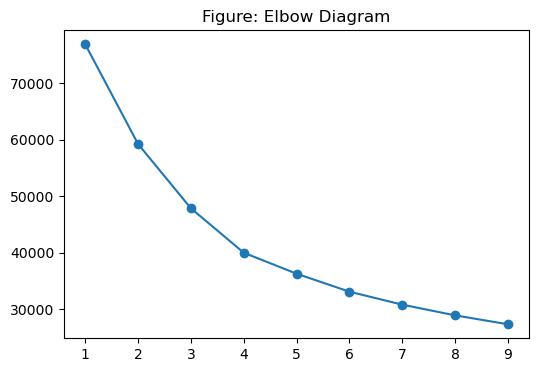

In [13]:
#Finding optimal number of clusters using Elbow Method
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_players_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Figure: Elbow Diagram");

In [14]:
k = 4
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_players_df )
players_df["clusterid"] = clusters.labels_

In [15]:
players_df[players_df.clusterid == 0]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid,clusterid
2,2,2000,Cory Alexander,PG,26,1.854110,83.900227,4,1995,29,...,34,42,58,24,2,28,39,82,0,0
4,4,2000,Rafer Alston,PG,23,1.879508,79.365079,0,1998,39,...,18,23,70,12,0,29,29,60,0,0
12,12,2000,B.J. Armstrong,PG,32,1.879508,79.365079,10,1989,18,...,45,47,78,7,1,40,34,201,0,0
14,14,2000,Chucky Atkins,PG,25,1.803312,83.900227,1,1996,78,...,106,126,306,52,3,142,137,782,0,0
15,15,2000,Stacey Augmon,SG,31,1.981103,92.970522,8,1991,9,...,74,116,53,27,11,38,69,203,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,10975,2022,Cassius Winston,PG,23,1.854110,83.900227,1,2020,53,...,1,1,7,0,0,3,9,14,0,0
10978,10978,2022,Delon Wright,SG,29,1.803312,87.074830,0,2021,80,...,170,220,188,93,19,45,56,342,0,0
10979,10979,2022,McKinley Wright IV,PG,23,1.955705,83.900227,6,2015,20,...,0,0,3,0,0,1,1,5,0,0
10980,10980,2022,Moses Wright,PF,23,2.031901,102.494331,0,2021,80,...,2,3,2,0,1,0,0,5,0,0


In [16]:
players_df[players_df.clusterid == 1]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid,clusterid
1,1,2000,Shareef Abdur-Rahim,SF,23,2.057300,102.040816,3,1996,3,...,607,825,271,89,87,249,244,1663,2,1
20,20,2000,Vin Baker,C,28,2.108097,108.843537,6,1993,8,...,378,605,148,47,66,213,288,1311,2,1
26,26,2000,Tony Battie,C,23,2.108097,104.308390,2,1997,5,...,258,410,63,47,70,67,249,541,2,1
45,45,2000,Shawn Bradley,C,27,2.285888,106.575964,6,1993,2,...,337,497,60,71,190,74,260,647,2,1
47,47,2000,Elton Brand,PF,20,2.057300,115.192744,0,1999,1,...,462,810,155,66,132,228,259,1627,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,10932,2022,Jonas Valan?i?nas,C,29,2.133496,120.181406,9,2011,5,...,617,843,190,41,60,179,247,1314,2,1
10938,10938,2022,Nikola Vu?evi?,C,31,2.108097,117.913832,10,2011,16,...,662,804,236,70,71,136,181,1288,2,1
10960,10960,2022,Hassan Whiteside,C,32,2.133496,120.181406,9,2010,33,...,328,494,26,22,103,53,179,534,2,1
10970,10970,2022,Robert Williams,C,24,2.031901,108.843537,3,2018,27,...,350,588,121,56,134,63,137,607,2,1


In [17]:
players_df[players_df.clusterid == 2]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid,clusterid
3,3,2000,Ray Allen,SG,24,1.955705,92.970522,3,1996,5,...,276,359,308,110,19,183,187,1809,1,2
6,6,2000,Derek Anderson,SG,25,1.955705,87.981859,2,1997,13,...,178,258,220,90,11,167,149,1080,1,2
7,7,2000,Kenny Anderson,PG,29,1.828711,76.190476,8,1991,2,...,170,225,420,139,8,130,230,1149,1,2
8,8,2000,Nick Anderson,SG,32,1.981103,103.401360,10,1989,11,...,256,339,123,94,16,95,118,781,1,2
9,9,2000,Shandon Anderson,SF,26,1.981103,94.331066,3,1996,54,...,293,384,239,96,32,194,182,1009,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,10958,2022,Coby White,PG,21,1.930306,88.435374,2,2019,7,...,165,182,176,29,11,70,137,772,1,2
10959,10959,2022,Derrick White,SG,27,1.930306,88.435374,4,2017,29,...,223,261,366,64,58,119,172,992,1,2
10963,10963,2022,Andrew Wiggins,SF,26,2.006502,92.063492,7,2014,1,...,240,325,161,76,51,111,158,1256,1,2
10976,10976,2022,Christian Wood,C,26,2.082698,101.133787,5,2015,80,...,576,686,155,54,65,126,171,1218,0,2


In [18]:
players_df[players_df.clusterid == 3]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid,clusterid
0,0,2000,Tariq Abdul-Wahad,SG,25,1.981103,101.133787,2,1997,11,...,190,291,98,59,28,106,147,697,0,3
5,5,2000,John Amaechi,C,29,2.082698,122.448980,1,1995,78,...,204,266,95,35,37,139,161,836,0,3
10,10,2000,Chris Anstey,C,25,2.133496,114.739229,2,1997,18,...,190,280,65,29,25,80,180,439,0,3
16,16,2000,Isaac Austin,C,30,2.082698,115.646259,6,1991,50,...,218,282,74,17,38,107,128,397,0,3
17,17,2000,Anthony Avent,PF,30,2.057300,106.575964,6,1991,15,...,51,74,11,16,15,24,62,81,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10974,10974,2022,Justise Winslow,PF,25,1.981103,100.680272,6,2015,10,...,152,202,84,35,25,49,67,274,0,3
10977,10977,2022,Robert Woodard II,SF,22,2.006502,104.308390,1,2020,40,...,6,11,3,1,1,1,3,7,0,3
10982,10982,2022,Thaddeus Young,PF,33,2.031901,106.575964,14,2007,12,...,128,208,104,54,18,52,81,322,0,3
10984,10984,2022,Omer Yurtseven,C,23,2.108097,115.646259,1,2020,80,...,209,294,49,17,20,41,84,299,0,3


In [19]:
players_df[players_df.clusterid == 4]

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid,clusterid


In [20]:
cluster_features = players_df.groupby('clusterid').agg( ["mean"] ).reset_index().round(2)
cluster_features

,clusterid,Rk,year,Age,HT,WT,YOS,Draft Year,Final Pick,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5889.22,2012.34,26.30,1.93,90.02,3.68,2007.07,49.65,40.31,...,26.53,77.30,103.84,62.57,23.65,9.86,37.17,65.29,248.71,0.04
1,1,4807.92,2010.09,26.20,2.07,109.81,5.34,2003.52,18.19,72.98,...,167.30,397.97,565.28,135.18,58.12,91.99,126.98,200.42,972.54,1.69
2,2,5795.14,2012.16,26.87,1.96,94.71,5.45,2005.47,22.93,71.75,...,55.35,236.39,291.74,291.75,78.12,22.86,142.00,156.42,1069.11,0.95
3,3,5226.80,2010.95,26.62,2.07,108.86,4.74,2004.81,29.01,43.64,...,44.03,107.92,151.95,46.51,22.17,16.43,38.31,80.17,267.52,0.14


In [21]:
cluster_features_organized = players_df.groupby('clusterid')['HT','WT' ,'Final Pick', '2P','3P','AST','BLK'].agg( ["mean"] ).reset_index()
cluster_features_organized

,clusterid,HT,WT,Final Pick,2P,3P,AST,BLK
,,mean,mean,mean,mean,mean,mean,mean
0,0,1.927881,90.016462,49.651611,70.172840,22.622403,62.574526,9.856971
1,1,2.073988,109.808891,18.193297,359.257989,19.556508,135.175370,91.993765
2,2,1.960633,94.707804,22.926610,277.128321,107.808645,291.745610,22.859973
3,3,2.068955,108.858902,29.011773,83.069198,18.805863,46.512254,16.427679
